## MOwNiT
### Julia Smerdel, ZadanieDomowe10 

#### Zad1. Symulacja wahadła matematycznego.

Równanie różniczkowe opisujące wahadło matematyczne: $\frac{d^2x}{dt^2}+\frac{g}{l}sinx = 0$

Można to zapisać w postaci $\frac{d^2x}{dt^2}=-\frac{g}{l}sinx = f(dx, x, p, t)$

Podstawmy $v(t) = \frac{dx}{dt}$. Otrzymamy wtedy układ dwóch równań pierwszego stopnia

$v = \frac{dx}{dt}$ <=> $\frac{dv}{dt} = \frac{d^2x}{dt^2}$

$\frac{dv}{dt} = -\frac{g}{l}sinx$


In [3]:
using DifferentialEquations, Plots, Colors, ProgressMeter

#defining values
g = 9.81 
l = 1.0
u0 = [0.9 * l, 0.0] #initial condition [x0, v0]
tspan = (0.0, 10.0) #timespan for the problem

p = (g, l); #parameters


In [4]:
function singlePendulum!(du, u, p, t)
    g, l = p
    du[1] = u[2]
    du[2] = -g/l * sin(u[1])
end

singlePendulum! (generic function with 1 method)

In [5]:
prob = ODEProblem(singlePendulum!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 0.9
 0.0

#### Euler

In [6]:
function eulerMethod(f, u0, p, tspan, dt=0.001)
    n = Int((tspan[2] - tspan[1]) / dt)
    t = [i * dt + tspan[1] for i in 0:n]
    u = zeros((n+1, 2))
    du = zeros(2)
    u[1, :] = u0
    
    for i in 1:n
        h = t[i+1] - t[i]
        singlePendulum!(du, u[i, :], p, t[i])
        u[i+1, :] = u[i, :] + h * du
    end
    return [t, u[:, 1], u[:, 2]]
end

eulerMethod (generic function with 2 methods)

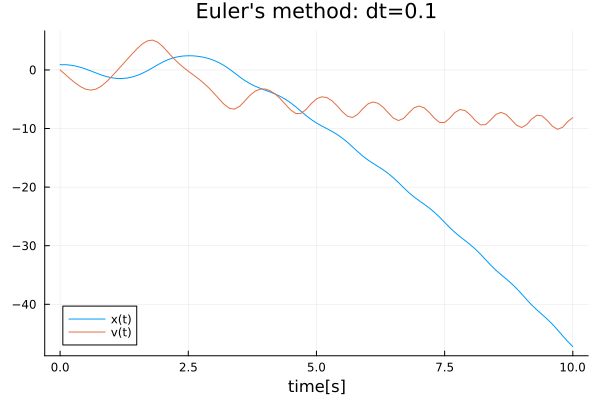

In [7]:
euler1 = eulerMethod(singlePendulum!, u0, p, tspan, 0.1)

plot(title="Euler's method: dt=0.1", xlabel="time[s]")
plot!((euler1[1], euler1[2]), label="x(t)")
plot!((euler1[1], euler1[3]), label="v(t)")

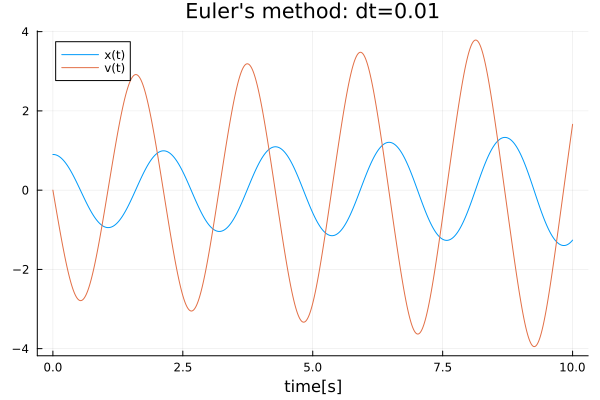

In [8]:
euler2 = eulerMethod(singlePendulum!, u0, p, tspan, 0.01)
plot(title="Euler's method: dt=0.01", xlabel="time[s]")
plot!((euler2[1], euler2[2]), label="x(t)")
plot!((euler2[1], euler2[3]), label="v(t)")

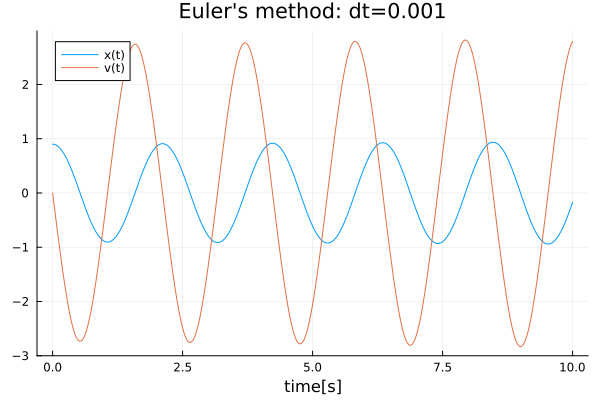

In [9]:
euler3 = eulerMethod(singlePendulum!, u0, p, tspan, 0.001)
plot(title="Euler's method: dt=0.001", xlabel="time[s]")
plot!((euler3[1], euler3[2]), label="x(t)")
plot!((euler3[1], euler3[3]), label="v(t)")

#### Runge-Kutta

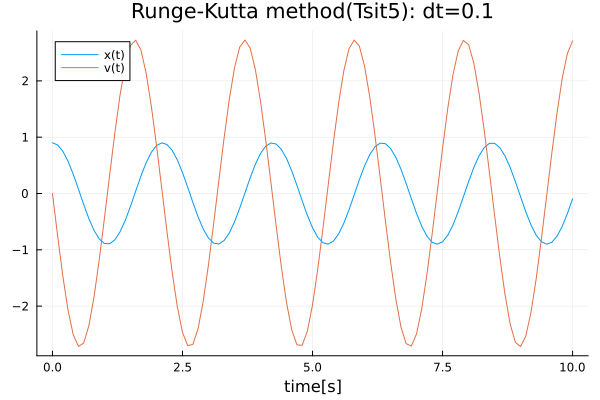

In [10]:
algorithm = Tsit5()
s1 = solve(prob, algorithm, dt=0.1, adaptive=false)
     
plot(title="Runge-Kutta method(Tsit5): dt=0.1", xlabel="time[s]")
plot!((s1.t, s1[1, :]), label="x(t)")
plot!((s1.t, s1[2, :]), label="v(t)")

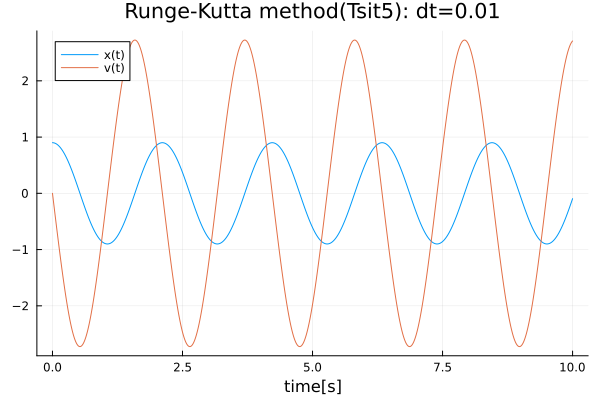

In [11]:
s2 = solve(prob, algorithm, dt=0.01, adaptive=false)
     
plot(title="Runge-Kutta method(Tsit5): dt=0.01", xlabel="time[s]")
plot!((s2.t, s2[1, :]), label="x(t)")
plot!((s2.t, s2[2, :]), label="v(t)")

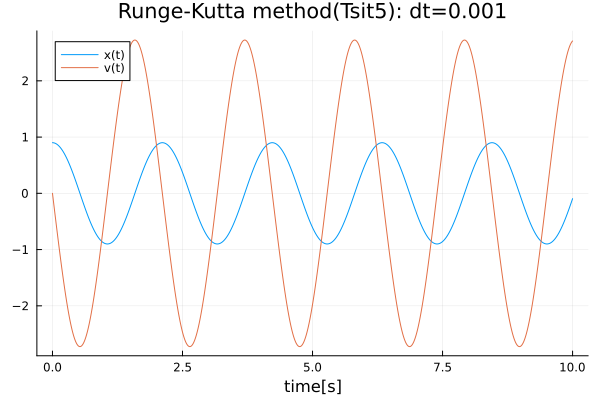

In [12]:
s3 = solve(prob, algorithm, dt=0.001, adaptive=false)
     
plot(title="Runge-Kutta method(Tsit5): dt=0.001", xlabel="time[s]")
plot!((s3.t, s3[1, :]), label="x(t)")
plot!((s3.t, s3[2, :]), label="v(t)")

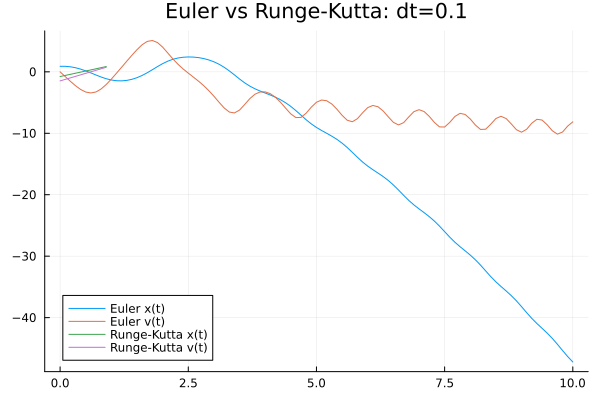

In [13]:
plot(title="Euler vs Runge-Kutta: dt=0.1")
plot!((euler1[1], euler1[2]), label="Euler x(t)")
plot!((euler1[1], euler1[3]), label="Euler v(t)")
plot!((s1[1], s1[2]), label="Runge-Kutta x(t)")
plot!((s1[1], s1[3]), label="Runge-Kutta v(t)")

In [32]:
function animateSinglePendulum(s, p, filename="singlePendulum.gif", fps=30, stepEvery=10)
    g, l = p
    n = length(s)
    x = s[1, :]
    y = [-sqrt(max(0, l^2 - xn^2)) for xn in x]
    c = (0, 0)     # center point
    d = l * 1.1    # just to set gif edges

    prog = Progress(n)
    anim = @animate for i in 1:n
        pi = (x[i], y[i])
        plot(size=(600, 600), xlim=(-d, d), ylim=(-d * 3/2, d/2), bg_color=colorant"#373e4b",
            legend=false, grid=false, showaxis=false, ticks=false)
        plot!([c, pi])
        scatter!([c, pi], ms=10, msw=0)
        next!(prog)
    end every 10

    gif(anim, filename, fps=fps)
end

animateSinglePendulum (generic function with 4 methods)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:22
[ Info: Saved animation to E:\Studia\2_rok\semestr4\MOWNiT\lab10\singlePendulum.gif


Plots.AnimatedGif("E:\\Studia\\2_rok\\semestr4\\MOWNiT\\lab10\\singlePendulum.gif")
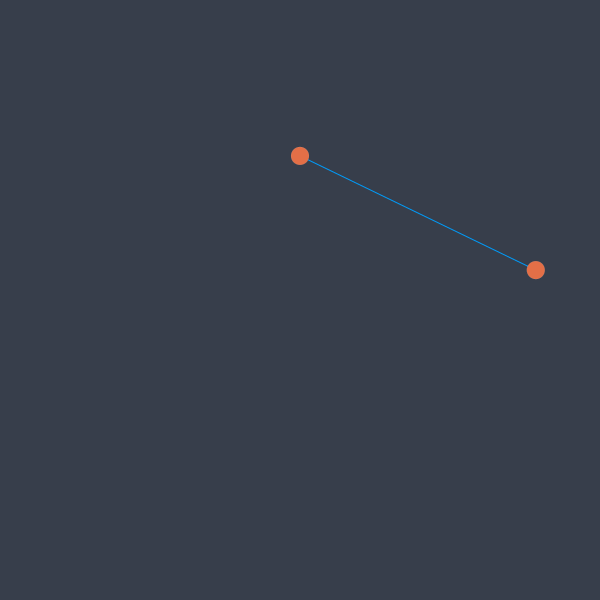

In [33]:
animateSinglePendulum(s3, p)

## Podwójne wahadło

$$\theta_1'=\omega_1$$

$$\theta_2'=\omega_2$$

$$\omega_1'=\frac{-g(2m_1+m_2)\sin{\theta_1}-m_2g\sin{(\theta_1-2\theta_2)}-2\sin{(\theta_1-\theta_2)}m_2(\omega_2^2L_2+\omega_1^2L_1\cos{(\theta_1-\theta_2)})}{L_1(2m_1+m_2-m_2\cos{(2\theta_1-2\theta_2)})}$$

$$\omega_2'=\frac{2\sin{(\theta_1-\theta_2)}(\omega_1^2L_1(m_1+m_2)+g(m_1+m_2)\cos{\theta_1}+\omega_2^2L_2m_2\cos{(\theta_1-\theta_2)})}{L_1(2m_1+m_2-m_2\cos{(2\theta_1-2\theta_2)})}$$

Wzory dostępne są na podanej stronie: https://www.myphysicslab.com/pendulum/double-pendulum-en.html

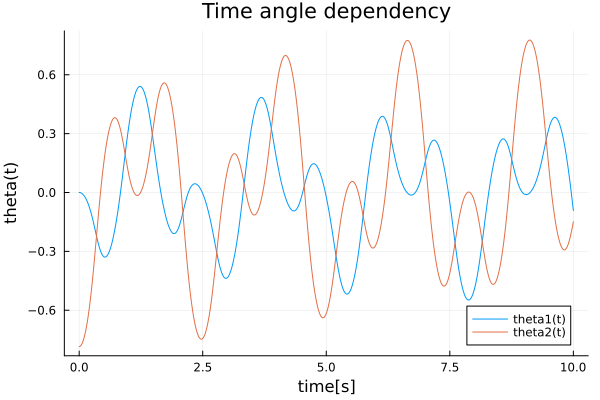

In [55]:
function doublePendulum!(du, u, p, t)
    g, m1, m2, L1, L2 = p
    omega1, omega2 = u[3], u[4]
    theta1, theta2 = u[1], u[2]
    a = -g * (2m1+m2) * sin(theta1)
    b = -m2 * g * sin(theta1 - 2*theta2)
    c = -2 * sin(theta1-theta2) * m2
    e = (omega2^2 * L2 + omega1^2 * L1 * cos(theta1-theta2))
    d = L1 * (2m1 + m2 - m2 * cos(2*theta1-2*theta2))
    f = 2 * sin(theta1 - theta2)
    h = omega1^2 * L1 * (m1+m1)
    i = g * (m1+m2) * cos(theta1)
    j = omega2^2 * L2 * m2 * cos(theta1 - theta2)
    
    du[1] = omega1
    du[2] = omega2
    du[3] = (a + b + c*e) / d
    du[4] = (f * (h + i + j)) / d
end



g = 9.81
m1, m2 = 1.0, 1.0
L1, L2 = 1.0, 1.0
theta1, theta2 = 0.0, -float(π/4)
omega1, omega2 = 0.0, 0.0
tspan = (0.0, 10.0);



u0 = [theta1, theta2, omega1, omega2]
p = (g, m1, m2, L1, L2)
prob = ODEProblem(doublePendulum!, u0, tspan, p)
s = solve(prob, dt=0.003, adaptive=false);



plot(title="Time angle dependency",
    xlabel="time[s]", ylabel="theta(t)")
plot!((s.t, s[1, :]), label="theta1(t)")
plot!((s.t, s[2, :]), label="theta2(t)")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:14
[ Info: Saved animation to E:\Studia\2_rok\semestr4\MOWNiT\lab10\doublePendulum1.gif


Plots.AnimatedGif("E:\\Studia\\2_rok\\semestr4\\MOWNiT\\lab10\\doublePendulum1.gif")
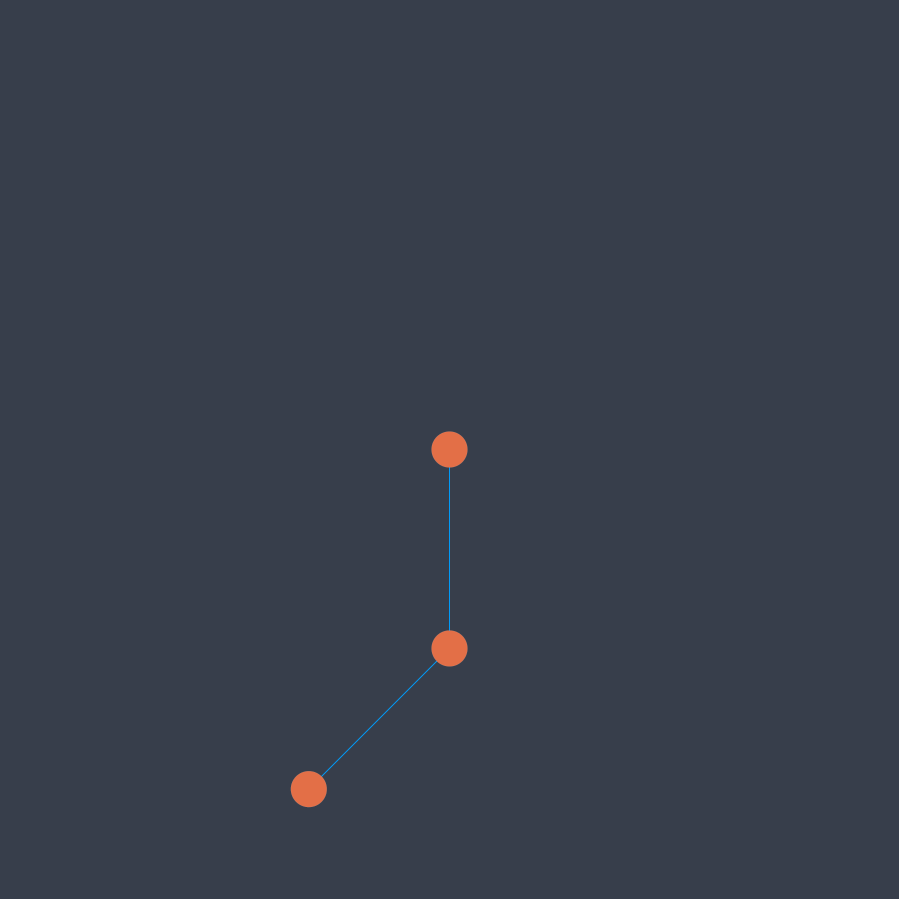

In [56]:
function animateDoublePendulum(s, p, filename="doublePendulum.gif", fps=30)
    g, m2, m2, L1, L2 = p
    n = length(s)
    theta = [s[1, :], s[2, :]]
    x1 = [L1 * sin(thetai) for thetai in theta[1]]
    y1 = [-L1 * cos(thetai) for thetai in theta[1]]
    x2 = [x1[j] + L2 * sin(thetaj) for (j, thetaj) in enumerate(theta[2])]
    y2 = [y1[j] - L2 * cos(thetaj) for (j, thetaj) in enumerate(theta[2])]
    c = (0, 0)
    d = (L1 + L2) * 1.1    # just to adjust gif edges
    ms = 20.0    # marker size
    M = max(m1, m2)
    ms1 = ms * ∛(m1 / M)
    ms2 = ms * ∛(m2 / M)
    
    prog = Progress(n)
    anim = @animate for i in 1:n
        p1 = (x1[i], y1[i])
        p2 = (x2[i], y2[i])
        plot(size=(900, 900), xlim=(-d, d), ylim=(-d, d), bg_color=colorant"#373e4b",
            legend=false, grid=false, showaxis=false, ticks=false)
        plot!([c, p1], color=palette(:default)[1])
        plot!([p1, p2], color=palette(:default)[1])
        scatter!([c], ms=ms, msw=0, color=palette(:default)[2])
        scatter!([p1], ms=ms1, msw=0, color=palette(:default)[2])
        scatter!([p2], ms=ms2, msw=0, color=palette(:default)[2])
        next!(prog)
    end every 10

    gif(anim, filename, fps=fps)
end

animateDoublePendulum(s, p, filename="doublePendulum1.gif")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:14
[ Info: Saved animation to E:\Studia\2_rok\semestr4\MOWNiT\lab10\doublePendulum2.gif


Plots.AnimatedGif("E:\\Studia\\2_rok\\semestr4\\MOWNiT\\lab10\\doublePendulum2.gif")
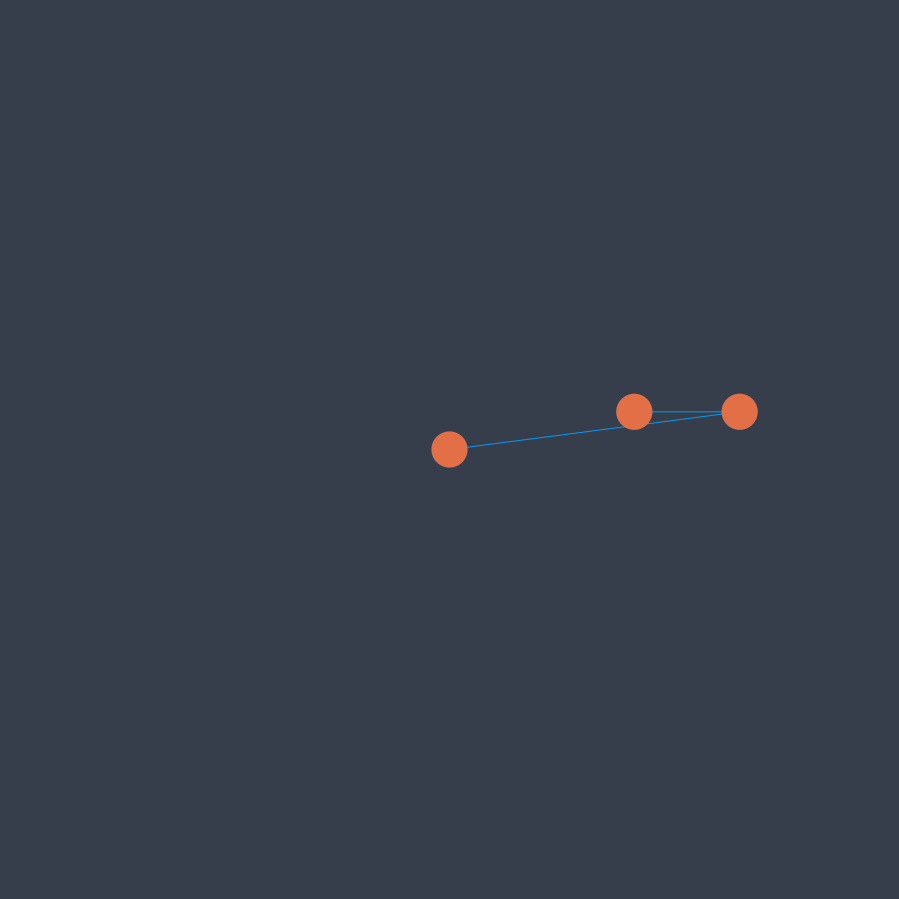

In [54]:
g = 9.81
m1, m2 = 1.0, 1.0
L1, L2 = 1.0, 0.36
theta1, theta2 = 1.7, -float(π/2)
omega1, omega2 = 0.0, 0.0
tspan = (0.0, 10.0);

u0 = [theta1, theta2, omega1, omega2]
p = (g, m1, m2, L1, L2)
prob = ODEProblem(doublePendulum!, u0, tspan, p)
s = solve(prob, dt=0.003, adaptive=false);
animateDoublePendulum(s, p, filename="doublePendulum2.gif")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:14
[ Info: Saved animation to E:\Studia\2_rok\semestr4\MOWNiT\lab10\doublePendulum2.gif


Plots.AnimatedGif("E:\\Studia\\2_rok\\semestr4\\MOWNiT\\lab10\\doublePendulum2.gif")
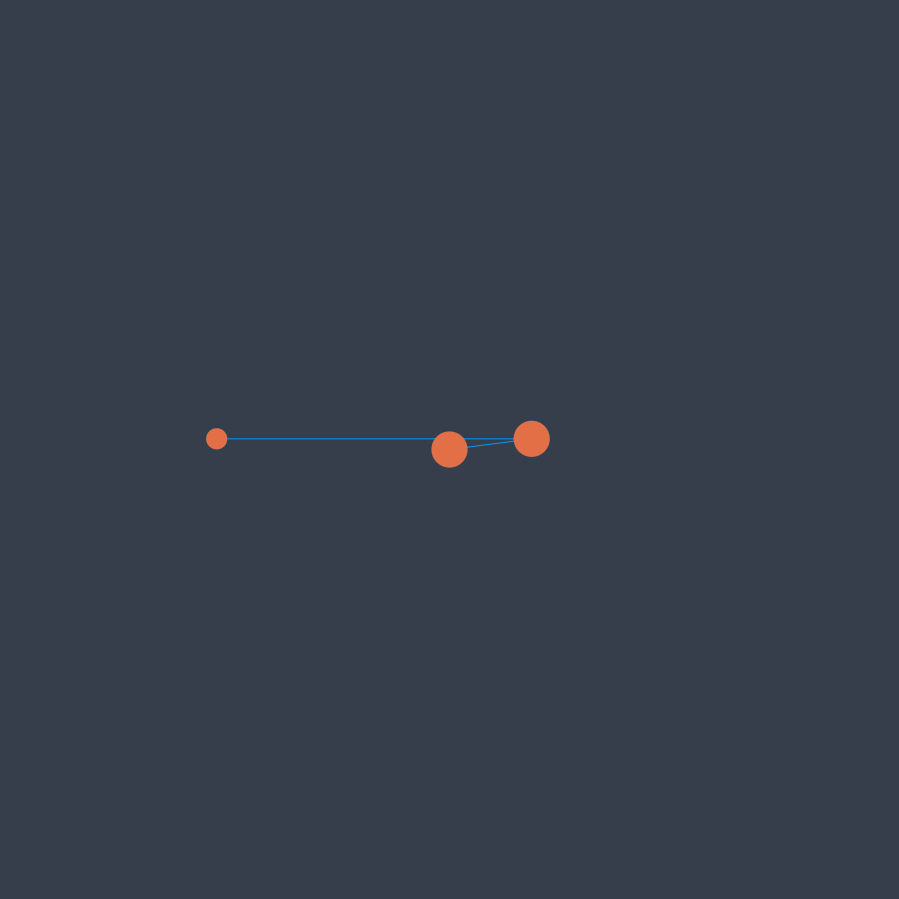

In [57]:
g = 9.81
m1, m2 = 10.0, 2.0
L1, L2 = 0.35, 1.33
theta1, theta2 = 1.7, -float(π/2)
omega1, omega2 = 0.0, 0.0
tspan = (0.0, 10.0);

u0 = [theta1, theta2, omega1, omega2]
p = (g, m1, m2, L1, L2)
prob = ODEProblem(doublePendulum!, u0, tspan, p)
s = solve(prob, dt=0.003, adaptive=false);
animateDoublePendulum(s, p, filename="doublePendulum3.gif")